Exploratory Data Analysis
=============

### 01 - Introduction

In this notebook we will make a Exploratory Data Analysis with the following goals in mind:
* Analyze the features of our clean data in order to understand the relationship between them.
* Answer the following questions:
    1. Es mejor
    2. Es peor
    3. Es igual
* Process the variables for feeding machine learning model/s.

__Importing Libraries__

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

#To plot figs on jupyter
%matplotlib inline
# figure size in inches
rcParams['figure.figsize'] = 14,6

### 02 - Loading our data

Reading data:

In [3]:
loans = pd.read_csv("../data/clean/loans.csv", sep = "^")
loans.drop("Unnamed: 0", axis = 1, inplace = True) # remove index column

In [4]:
loans.head(10)

,funded_amnt_inv,term,issue_d,installment,int_rate,sub_grade,emp_title,emp_length,annual_inc,title,dti,home_ownership,zip_code,addr_state,last_pymnt_amnt,total_pymnt_inv,total_rec_late_fee,loan_status
0,10000.0,60 months,Mar-2016,262.34,19.53%,D5,lpn/charge nurse,4 years,52000.0,Other,15.00,OWN,317xx,GA,9575.49,11127.83,0.0,Fully Paid
1,35000.0,60 months,Mar-2016,941.96,20.75%,E2,Coiler,3 years,85000.0,Debt consolidation,24.98,MORTGAGE,144xx,NY,509.10,37226.47,0.0,Fully Paid
2,20000.0,60 months,Mar-2016,416.73,9.16%,B2,Reliability Engineer,1 year,77000.0,Home improvement,13.75,MORTGAGE,606xx,IL,416.73,9147.70,0.0,Current
3,17475.0,60 months,Mar-2016,384.06,11.47%,B5,NaN,NaN,41682.0,Debt consolidation,30.06,MORTGAGE,796xx,TX,384.06,8432.61,0.0,Current
4,8000.0,36 months,Mar-2016,255.00,9.16%,B2,Technician,10+ years,72000.0,Debt consolidation,22.63,RENT,217xx,MD,255.00,5601.86,0.0,Current
5,14400.0,36 months,Mar-2016,469.74,10.75%,B4,Coder,10+ years,85000.0,Business,28.11,MORTGAGE,037xx,NH,10992.93,15673.13,0.0,Fully Paid
6,18000.0,60 months,Mar-2016,400.31,11.99%,C1,Registered Nurse,6 years,100000.0,Debt consolidation,20.41,MORTGAGE,986xx,WA,14885.49,20465.85,0.0,Fully Paid
7,5800.0,36 months,Mar-2016,191.18,11.47%,B5,shipping,2 years,21000.0,NaN,16.91,RENT,799xx,TX,191.18,4198.57,0.0,Current
8,12500.0,60 months,Mar-2016,293.85,14.46%,C4,Occupational Therapist Assisstant,1 year,91000.0,Debt consolidation,11.83,RENT,270xx,NC,293.85,6444.62,0.0,Current
9,3000.0,36 months,Mar-2016,93.17,7.39%,A4,account sales manager,10+ years,90000.0,Home improvement,1.23,MORTGAGE,184xx,PA,93.17,2047.58,0.0,Current


In [5]:
loans.shape

(1765426, 18)

Variable types:

In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765426 entries, 0 to 1765425
Data columns (total 18 columns):
funded_amnt_inv       float64
term                  object
issue_d               object
installment           float64
int_rate              object
sub_grade             object
emp_title             object
emp_length            object
annual_inc            float64
title                 object
dti                   float64
home_ownership        object
zip_code              object
addr_state            object
last_pymnt_amnt       float64
total_pymnt_inv       float64
total_rec_late_fee    float64
loan_status           object
dtypes: float64(7), object(11)
memory usage: 242.4+ MB


In [32]:
loans.describe()

,funded_amnt_inv,term,issue_d,installment,int_rate,sub_grade,emp_title,emp_length,annual_inc,title,dti,home_ownership,zip_code,addr_state,last_pymnt_amnt,total_pymnt_inv,total_rec_late_fee,loan_status
count,1765426.0,1765426,1765426,1765426.00,1765426,1765426,1653275,1660540,1765426.0,1742103,1764847,1765426,1765425,1765426,1765426.00,1765426,1765426.0,1765426
unique,9025.0,4,129,86603.00,601,37,448269,13,77009.0,61687,8312,8,954,53,543275.00,1038684,13259.0,7
top,10000.0,36 months,Mar-2016,301.15,11.99%,C1,Teacher,10+ years,60000.0,Debt consolidation,Fully Paid,MORTGAGE,945xx,CA,301.15,Fully Paid,0.0,Current
freq,123548.0,1262645,61992,4139.00,49742,117389,30145,587153,68173.0,893638,1988,870974,18845,246942,3007.00,1988,1710482.0,843754


### 03 - Loan Status Analysis

Since one of our project main goals is to predict whether a debt is going to be paid or not, this part of the analysis will focus on `loan_status` variable, i. e., the current status of the loan.

Let's see the __loan status__ distribution:

In [9]:
loans['loan_status'].value_counts()

Current                                                843754
Fully Paid                                             698690
Charged Off                                            182199
Late (31-120 days)                                      21742
In Grace Period                                         11812
Late (16-30 days)                                        4423
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    57
Name: loan_status, dtype: int64

We are going to consider _Does not meet the credit policy. Status:Fully Paid_ as `Fully Paid` and _Does not meet the credit policy. Status:Charged Off_ as `Charged Off` although the do not meet the credit policy.

In [11]:
loans[loans['loan_status']=="Does not meet the credit policy. Status:Fully Paid"] = "Fully Paid"
loans[loans['loan_status']=="Does not meet the credit policy. Status:Charged Off"] = "Charged Off"

In [12]:
loans['loan_status'].value_counts()

Current               843754
Fully Paid            700678
Charged Off           182960
Late (31-120 days)     21742
In Grace Period        11812
Late (16-30 days)       4423
Default                   57
Name: loan_status, dtype: int64

Let's plot the distribution in a barplot:

Text(0.5,1,'Loan Status Count')

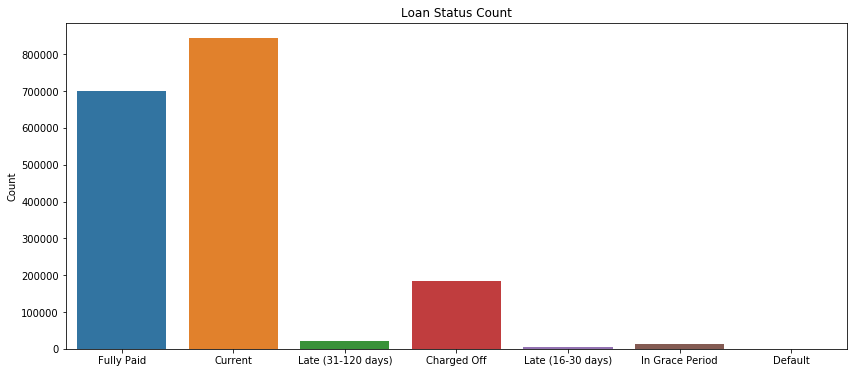

In [34]:
g = sns.countplot(x="loan_status", data=loans)

g.set_xlabel("", fontsize=6)
g.set_ylabel("Count", fontsize=10)
g.set_title("Loan Status Count", fontsize=12)

__Some other interesting analysis__

In [41]:
g = sns.boxplot(x="loan_status", y="funded_amnt_inv", data=loans)

g.set_xlabel("", fontsize=6)
g.set_ylabel("Loan Amount", fontsize=10)
g.set_title("Loan Amount distribution by Status", fontsize=12)

ValueError: Neither the `x` nor `y` variable appears to be numeric.